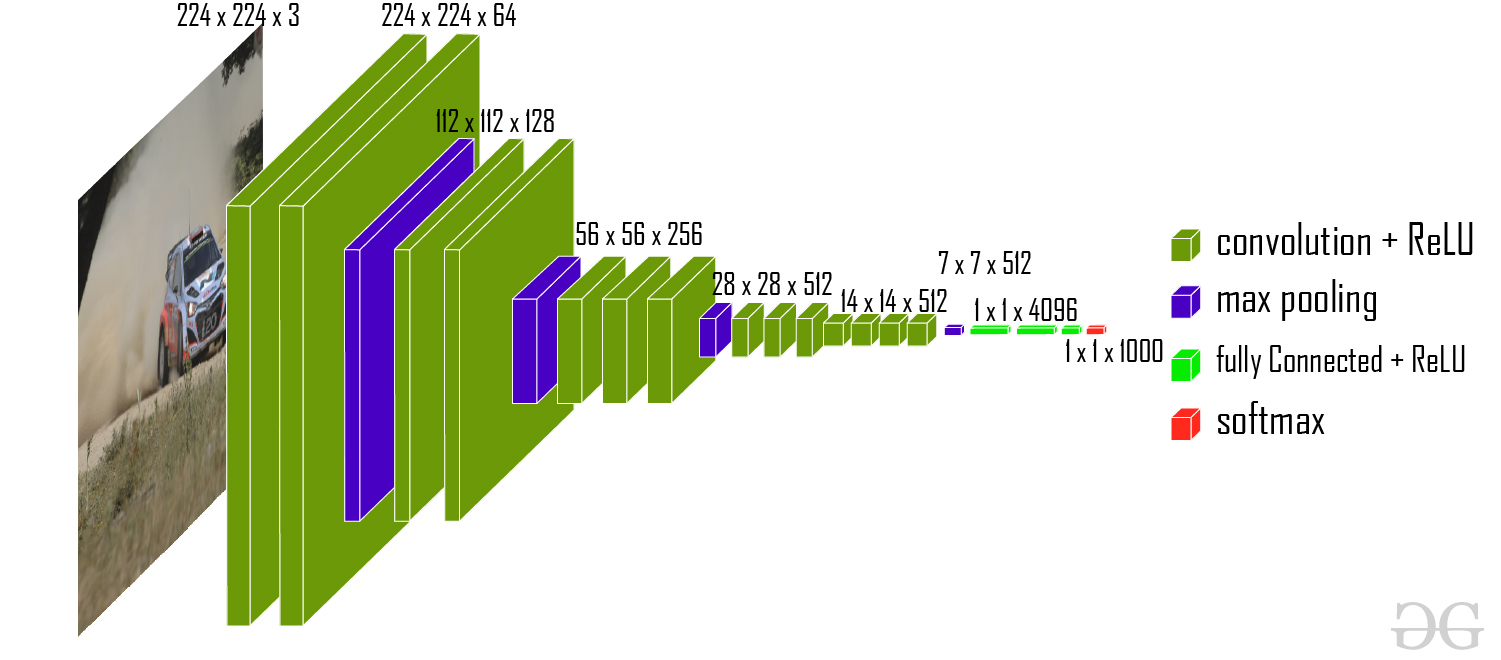

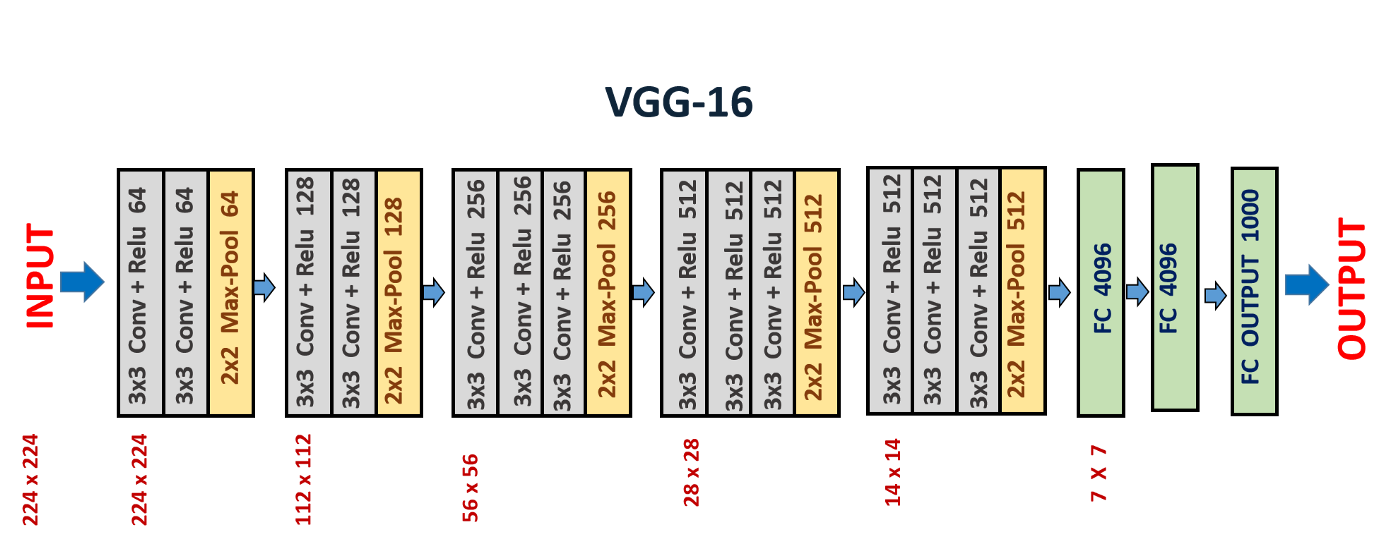

In [1]:
import torch
import torch.nn as nn

In [42]:
class VGG16(nn.Module):
    def __init__(self, INPUT_CHANNEL, NO_OF_CLASSES):
        super().__init__()
        
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size = (2,2), stride = (2, 2))
        self.conv11 = nn.Conv2d(in_channels = INPUT_CHANNEL, out_channels = 64, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        self.conv12 = nn.Conv2d(in_channels = 64, out_channels = 64, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        
        
        self.conv21 = nn.Conv2d(in_channels = 64, out_channels = 128, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        self.conv22 = nn.Conv2d(in_channels = 128, out_channels = 128, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        
        
        self.conv31 = nn.Conv2d(in_channels = 128, out_channels = 256, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        self.conv32 = nn.Conv2d(in_channels = 256, out_channels = 256, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        
        
        self.conv41 = nn.Conv2d(in_channels = 256, out_channels = 512, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        self.conv42 = nn.Conv2d(in_channels = 512, out_channels = 512, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        self.conv43 = nn.Conv2d(in_channels = 512, out_channels = 4096, 
                                kernel_size = (3,3), stride = 2, padding = 2)
        
        
        self.linear1 = nn.Linear(in_features = 4096, out_features = 4096)
        self.linear2 = nn.Linear(in_features = 4096, out_features = NO_OF_CLASSES)
        
        
    def forward(self, x):
        # First Layer
        x = self.relu(self.conv11(x))
        x = self.relu(self.conv12(x))
        x = self.pool(x)
        
        
        # Second Layer
        x = self.relu(self.conv21(x))
        x = self.relu(self.conv22(x))
        x = self.pool(x)
        
    
        # Third Layer
        x = self.relu(self.conv31(x))
        x = self.relu(self.conv32(x))
        x = self.relu(self.conv32(x))
        x = self.pool(x)
        
        # Fourth Layer
        x = self.relu(self.conv41(x))
        x = self.relu(self.conv42(x))
        x = self.relu(self.conv42(x))
        x = self.pool(x)
        
        
        
        # Fifth Layer
        x = self.relu(self.conv42(x))
        x = self.relu(self.conv42(x))
        x = self.relu(self.conv43(x))
        x = self.pool(x)
        
        
        # Now after 5th layer, the output is in shape "num_examples x 4096 x 1 x 1".
        # We want to convert it into "num_examples x 4096" to convert it into single dimension.
        
        x = x.reshape(x.shape[0], -1)  # now this Conv block is of "num_examples x 4096" that is 1 dimension only.
        
        # Now we can apply FC layer
        x = self.relu(self.linear1(x))
        x = self.linear2(x)            # we will not apply any activation function here.
        
        return x
        

In [43]:
x = torch.randn(64, 3, 224, 224)
print(x.shape)

torch.Size([64, 3, 224, 224])


In [44]:
model = VGG16(INPUT_CHANNEL = 3, NO_OF_CLASSES = 1000)

In [45]:
model(x).shape

torch.Size([64, 4096, 1, 1])

We gave x as an input with shape [64, 3, 224, 224] where 64 is the batch of images and 3,224,224 is the image dimensions so total 64 images with those dimensions are going in the VGG16 as an input and after all those layers we are getting final output as expected [64, 1000], where 1000 is the no of dimensions of final layer.